# ARIMA and Seasonal ARIMA

# Autoregressive Integrated Moving Averages

The general process for ARIMA models is the following:

- Visualize the Time Series Data
- Make the time series data stationary
- Plot the Correlation and AutoCorrelation Charts
- Construct the ARIMA Model or Seasonal ARIMA based on the data
- Use the model to make predictions

# 1- Import Libraries

In [1]:
# Import pandas and numpy libraries

import pandas as pd
import numpy as np

In [2]:
# Visualization

import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
# Visible All Rows and Columns

pd.set_option('display.max_rows', None, 'display.max_columns', None)

# 2- Upload Data

In [4]:
# Upload file from Desktop

d1 = pd.read_csv('/Users/ilyasozgur/Desktop/Revenue_Prediction/Raw_Data_Revenue_Prediction.csv')

In [5]:
d1.head()

,Month,Perrin Freres monthly champagne sales millions ?64-?72
0,1964-01,2815.0
1,1964-02,2672.0
2,1964-03,2755.0
3,1964-04,2721.0
4,1964-05,2946.0


# 3- Data Cleaning

In [6]:
# Check the null values

d1.isnull().sum()

Month                                                     1
Perrin Freres monthly champagne sales millions ?64-?72    2
dtype: int64

In [7]:
# Check the null values

d1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 107 entries, 0 to 106
Data columns (total 2 columns):
 #   Column                                                  Non-Null Count  Dtype  
---  ------                                                  --------------  -----  
 0   Month                                                   106 non-null    object 
 1   Perrin Freres monthly champagne sales millions ?64-?72  105 non-null    float64
dtypes: float64(1), object(1)
memory usage: 1.8+ KB


In [8]:
# Check the total row numbers

d1.shape

(107, 2)

In [9]:
# Rename the column names 

d1.columns = ['Month','Sales']

In [10]:
# Drop the all null values 

d1 =d1[d1['Month'].notna()]
d1 =d1[d1['Sales'].notna()]

In [11]:
# Month column datatype is object
# It needs to be date, therefore convert it

d1['Month'] = pd.to_datetime(d1['Month'])
d1.info()
d1.head(2)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 105 entries, 0 to 104
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Month   105 non-null    datetime64[ns]
 1   Sales   105 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 2.5 KB


,Month,Sales
0,1964-01-01,2815.0
1,1964-02-01,2672.0


In [12]:
# Set Month column as Index

d1 = d1.set_index('Month')
d1.info()
d1.head(2)

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 105 entries, 1964-01-01 to 1972-09-01
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Sales   105 non-null    float64
dtypes: float64(1)
memory usage: 1.6 KB


,Sales
Month,
1964-01-01,2815.0
1964-02-01,2672.0


# 4- Visualization

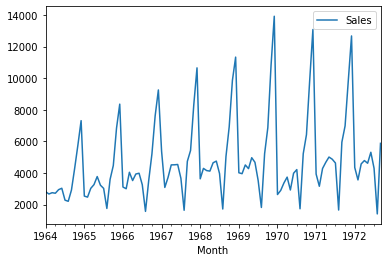

In [13]:
# Visualize the Data

d1.plot()

# 5- Hypothesis Test

In [14]:
# Hypothesis Test Libraries

from statsmodels.tsa.stattools import adfuller

In [15]:
# Create a function for hypothetical test
# H0 is the assumption that we dont want to accept
# H1 is the assumption that we think that it is true

# H0: It is non stationary
# H1: It is stationary

def adfuller_test(sales):
    
    result=adfuller(sales)
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used']
    
    for value,label in zip(result,labels):
        print(label+' : '+str(value) )
        print('')
    
    if result[1] <= 0.05:
        print('The Results is : Yess!!!! Strong evidence against the null hypothesis(Ho) ' +
              'Reject the null Hypothesis... ' + 'Yesss!!! ' + 'Data has no unit root and is stationary')
    
    else:
        print('The Results is : Ohhhh noooo!!!!!... ' + 
              'Weak evidence against null hypothesis, Time series has a unit root ' +
              'Indicating it is non-stationary'+ 'It must be convert to stationary')

In [16]:
# Apply the hypothetical test to the selected column 

adfuller_test(d1['Sales'])

ADF Test Statistic : -1.8335930563276193

p-value : 0.36391577166024686

#Lags Used : 11

Number of Observations Used : 93

The Results is : Ohhhh noooo!!!!!... Weak evidence against null hypothesis, Time series has a unit root Indicating it is non-stationaryIt must be convert to stationary


# 6- Convert Dataset to Stationary 

In [17]:
# To conver dataset to Stationary, first we need to create a difference column
# Since the our dataset is seasonal, it means 12 months, we need to shift the sales column 12 rows

d2 = d1.copy()
d2['Seasonal_Difference'] = d2['Sales'] - d2['Sales'].shift(12)

d2.info()
d2.head(14)

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 105 entries, 1964-01-01 to 1972-09-01
Data columns (total 2 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Sales                105 non-null    float64
 1   Seasonal_Difference  93 non-null     float64
dtypes: float64(2)
memory usage: 2.5 KB


,Sales,Seasonal_Difference
Month,,
1964-01-01,2815.0,NaN
1964-02-01,2672.0,NaN
1964-03-01,2755.0,NaN
1964-04-01,2721.0,NaN
1964-05-01,2946.0,NaN
1964-06-01,3036.0,NaN
1964-07-01,2282.0,NaN
1964-08-01,2212.0,NaN
1964-09-01,2922.0,NaN


In [18]:
# Check the nan values in the dataframe

d2.isnull().sum()

Sales                   0
Seasonal_Difference    12
dtype: int64

In [19]:
# As it is seen that after shifting the data has includede some Nan values 
# Therefore, we need to drop that values 

d2 = d2[d2['Seasonal_Difference'].notna()]

d2.info()
d2.head()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 93 entries, 1965-01-01 to 1972-09-01
Data columns (total 2 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Sales                93 non-null     float64
 1   Seasonal_Difference  93 non-null     float64
dtypes: float64(2)
memory usage: 2.2 KB


,Sales,Seasonal_Difference
Month,,
1965-01-01,2541.0,-274.0
1965-02-01,2475.0,-197.0
1965-03-01,3031.0,276.0
1965-04-01,3266.0,545.0
1965-05-01,3776.0,830.0


In [20]:
# Rerun the hypothetical test function and check the results for p-value

adfuller_test(d2['Seasonal_Difference'])

ADF Test Statistic : -7.626619157213166

p-value : 2.0605796968136632e-11

#Lags Used : 0

Number of Observations Used : 92

The Results is : Yess!!!! Strong evidence against the null hypothesis(Ho) Reject the null Hypothesis... Yesss!!! Data has no unit root and is stationary


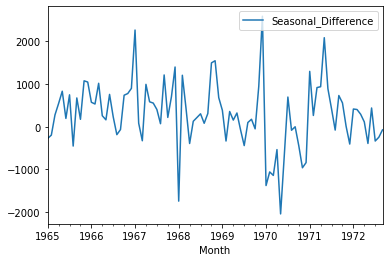

In [21]:
# Visualize the data

d2[['Seasonal_Difference']].plot()

# 7- Auto Regressive Model

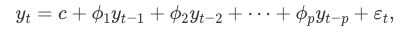

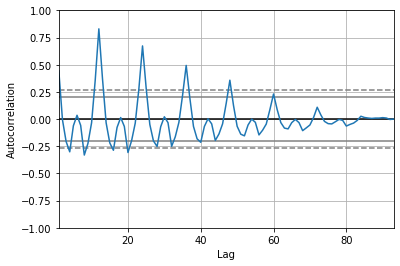

In [22]:
# Autocorrelation Visualization

from pandas.plotting import autocorrelation_plot

autocorrelation_plot(d2['Sales'])
plt.show()

## Final Thoughts on Autocorrelation and Partial Autocorrelation

- Identification of an AR model is often best done with the PACF.
    - For an AR model, the theoretical PACF “shuts off” past the order of the model. 

The phrase “shuts off” means that in theory the partial autocorrelations are equal to 0 beyond that point. Put another way, the number of non-zero partial autocorrelations gives the order of the AR model. By the “order of the model” we mean the most extreme lag of x that is used as a predictor.

- Identification of an MA model is often best done with the ACF rather than the PACF.

    - For an MA model, the theoretical PACF does not shut off, but instead tapers toward 0 in some manner. A   clearer pattern for an MA model is in the ACF. The ACF will have non-zero autocorrelations only at lags involved in the model.
    
    
    - p AR model lags
    - d Differencing
    - q Moving Average lags



In [23]:
# Statistical Model Visualization

from statsmodels.tsa.stattools import acf, pacf
import statsmodels.api as sm

In [24]:
#pip install statsmodels

/opt/anaconda3/lib/python3.7/site-packages/statsmodels/graphics/tsaplots.py:353: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  FutureWarning,


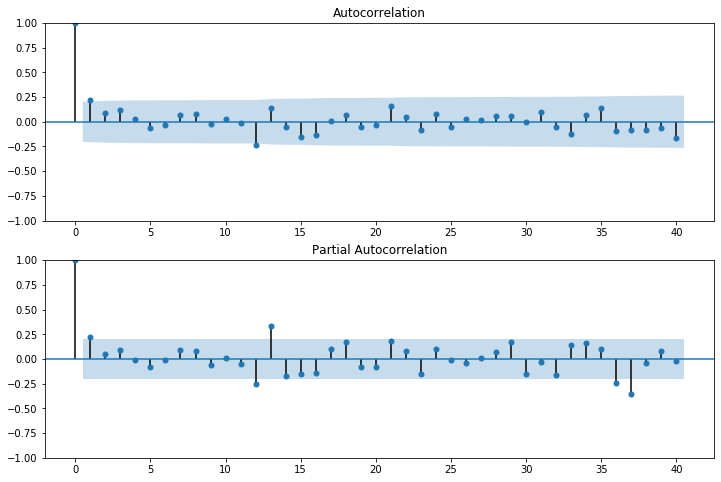

In [25]:
# Visualization 

fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)

fig = sm.graphics.tsa.plot_acf(d2['Seasonal_Difference'], lags=40, ax = ax1)
ax2 = fig.add_subplot(212)

fig = sm.graphics.tsa.plot_pacf(d2['Seasonal_Difference'],lags=40,ax=ax2)

# 8- Model Building

## 8.1- Model Building with ARIMA(non-seasonal)

In [26]:
d2.info()
d2.head(2)

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 93 entries, 1965-01-01 to 1972-09-01
Data columns (total 2 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Sales                93 non-null     float64
 1   Seasonal_Difference  93 non-null     float64
dtypes: float64(2)
memory usage: 2.2 KB


,Sales,Seasonal_Difference
Month,,
1965-01-01,2541.0,-274.0
1965-02-01,2475.0,-197.0


In [27]:
# For non-seasonal data
# Selected p,q, d values 
# p=1, d=1, q=0 or 1

from statsmodels.tsa.arima.model import ARIMA

In [28]:
d2.head()

,Sales,Seasonal_Difference
Month,,
1965-01-01,2541.0,-274.0
1965-02-01,2475.0,-197.0
1965-03-01,3031.0,276.0
1965-04-01,3266.0,545.0
1965-05-01,3776.0,830.0


In [29]:
# Build Model

model     = ARIMA(d2['Sales'],order=(1,1,1))
results_1  = model.fit()

/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:539: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:539: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:539: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


In [30]:
results_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  Sales   No. Observations:                   93
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -846.679
Date:                Sun, 06 Feb 2022   AIC                           1699.358
Time:                        20:49:26   BIC                           1706.924
Sample:                    01-01-1965   HQIC                          1702.412
                         - 09-01-1972                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.4711      0.050      9.480      0.000       0.374       0.568
ma.L1         -0.9995      0.133     -7.530      0.000      -1.260      -0.739
sigma2      5.559e+06   2.44e-08   2.27e+14      0.000    5.56e+06    5.56e+06
===================================================================================
Ljung-Box (L1) (Q):                   0.60   Jarque-Bera (JB):                 1.48
Prob(Q):                              0.44   Prob(JB):                         0.48
Heteroskedasticity (H):               2.56   Skew:                             0.05
Prob(H) (two-sided):                  0.01   Kurtosis:                         3.61
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 9.53e+29. Standard errors may be unstable.
"""

## 8.1 - Forecast the Revenue with ARIMA

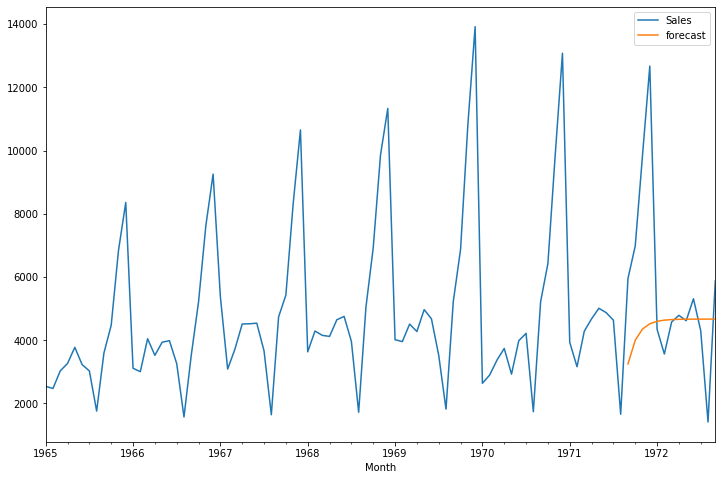

In [31]:
d2['forecast'] = results_1.predict(start=80,end=103,dynamic=True)
d2[['Sales','forecast']].plot(figsize=(12,8))

## 8.2 Model Building with SARIMA

In [32]:
# Import Sarimax library

import statsmodels.api as sm

In [33]:
model_2 = sm.tsa.statespace.SARIMAX(d2['Sales'],order=(1, 1, 1),seasonal_order=(1,1,1,12))
results_2 = model_2.fit()

/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:539: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:539: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


## 8.2 - Forecast the Revenue with SARIMA

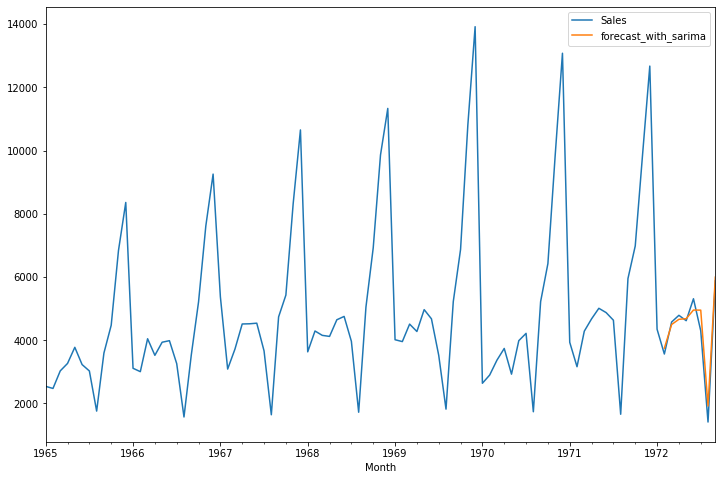

In [43]:
d2['forecast_with_sarima'] = results_2.predict(start=85, end=103, dynamic=True)
d2[['Sales','forecast_with_sarima']].plot(figsize=(12,8))

# 9 - Predict the Future Revenue 

In [44]:
# For predicting Future Revenue 
# Add future dates first 

# import neccessary library
from pandas.tseries.offsets import DateOffset

# Starting from the latest month, create new date list 
future_dates = [d2.index[-1]+ DateOffset(months=x) for x in range(0,24)]

# Convert this list to dataframe, based on the d2(current dataframe) for columns
# Starting from the first index, therefore index[0] dropped

d3 = pd.DataFrame(index=future_dates[1:], columns = d2.columns)

d3.info()
d3.tail(2)

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 23 entries, 1972-10-01 to 1974-08-01
Data columns (total 4 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Sales                 0 non-null      object
 1   Seasonal_Difference   0 non-null      object
 2   forecast              0 non-null      object
 3   forecast_with_sarima  0 non-null      object
dtypes: object(4)
memory usage: 920.0+ bytes


,Sales,Seasonal_Difference,forecast,forecast_with_sarima
1974-07-01,NaN,NaN,NaN,NaN
1974-08-01,NaN,NaN,NaN,NaN


In [45]:
# Concat two dataframe d2 and d3 for future forecasts

d3 = pd.concat([d2, d3])
d3 = d3.drop('forecast',axis=1)

d3.info()
d3.head(2)

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 116 entries, 1965-01-01 to 1974-08-01
Data columns (total 3 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Sales                 93 non-null     float64
 1   Seasonal_Difference   93 non-null     float64
 2   forecast_with_sarima  8 non-null      float64
dtypes: float64(3)
memory usage: 3.6 KB


,Sales,Seasonal_Difference,forecast_with_sarima
1965-01-01,2541.0,-274.0,NaN
1965-02-01,2475.0,-197.0,NaN


## 9.1 Predict Future Revenue with trained model_2 with Sarima

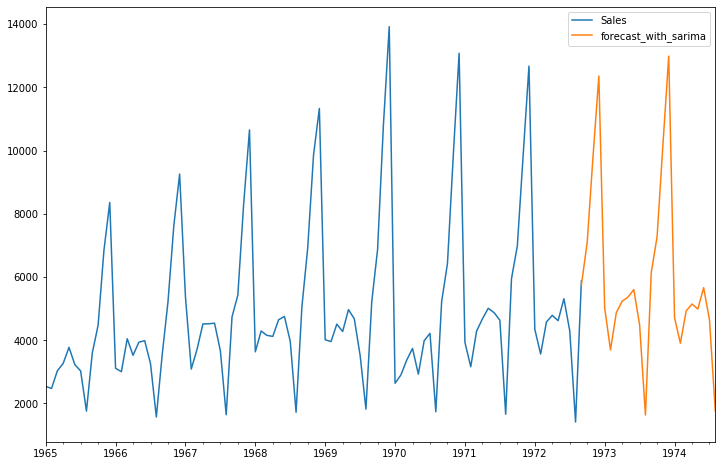

In [53]:
# Predict the future dates Revenue

d3['forecast_with_sarima'] = results_2.predict(start = 92, end = 120, dynamic= True)  

# Visualize the predictions 

d3[['Sales', 'forecast_with_sarima']].plot(figsize=(12, 8)) 